In this notebook, we are trying to classify the images for traffic signs into one of the classes

In [1]:
# Import Libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Conv2D, MaxPool2D

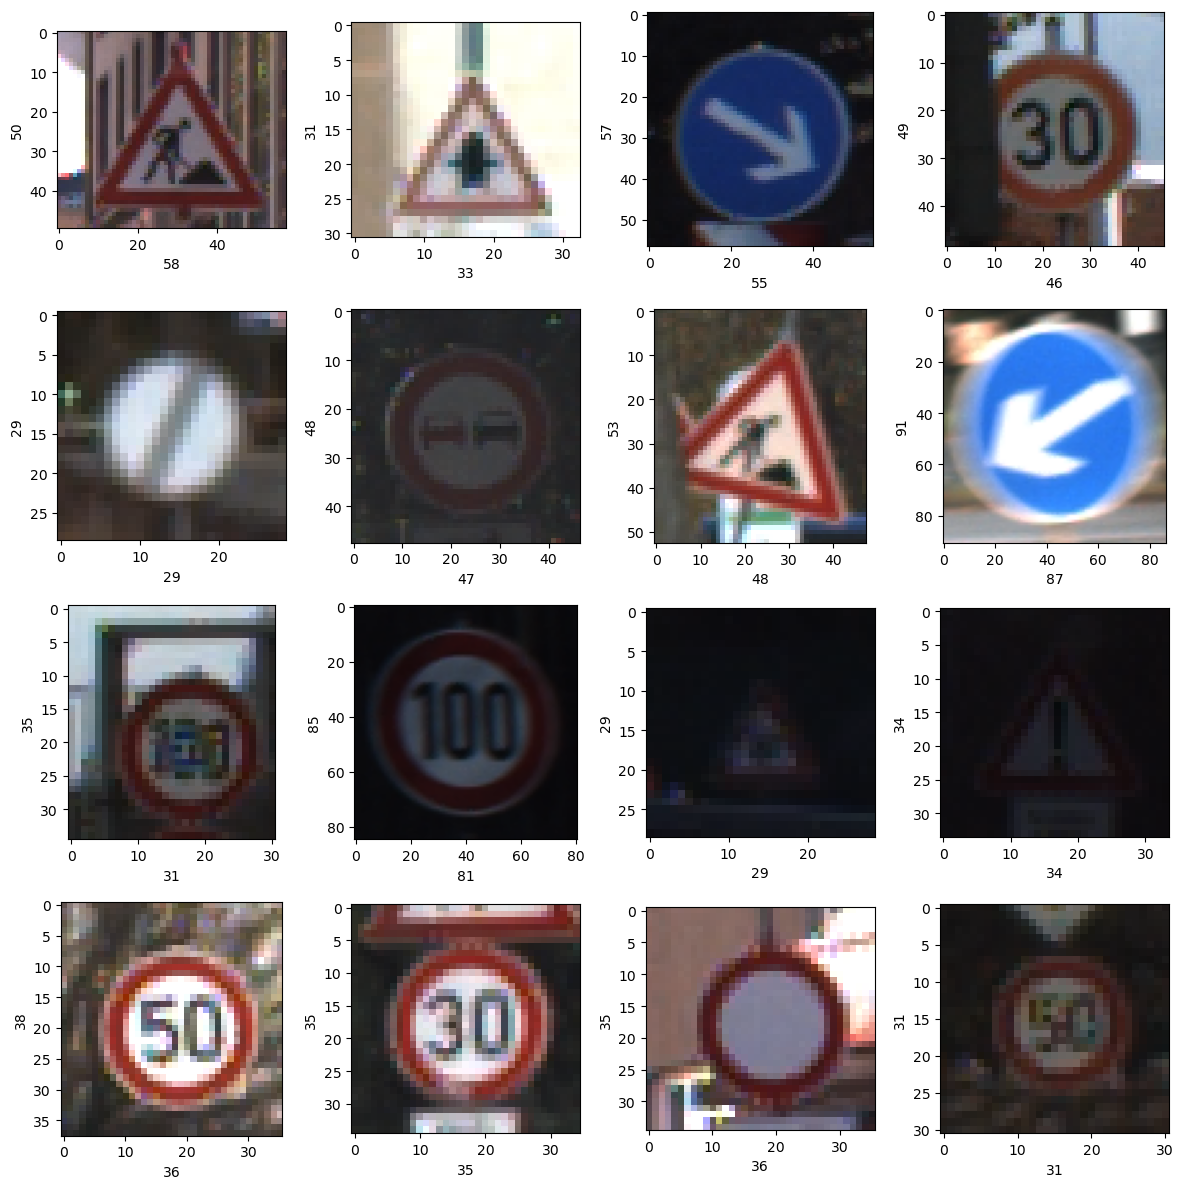

In [2]:
# Plotting 12 random image to check the dataset
plt.figure(figsize=(12,12))
path = '/kaggle/input/gtsrb-german-traffic-sign/Test'
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/' +random.choice(os.listdir(path)))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1])
    plt.ylabel(rand_img.shape[0])
    

In [3]:
dim1=[]
dim2=[]

for i in range(0,43):
    lables='/kaggle/input/gtsrb-german-traffic-sign/Train'+'/{0}'.format(i)
    image_path = os.listdir(lables)
    for x in image_path:
        img = imread(lables + '/' +x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [4]:
# printing the dimenstions of the images
print('Dimension 1 Mean:', np.mean(dim1), "Dimension 2 mean:", np.mean(dim2))

Dimension 1 Mean: 50.328929582493814 Dimension 2 mean: 50.83587951745773


We see that the mean of the Images are 50 X 50 so resizing all the images to 50*50

In [5]:
# Resize
images = []
label_id = []

for i in range(43): 
    labels = '/kaggle/input/gtsrb-german-traffic-sign/Train' +'/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)
                         

In [6]:
# Converting the images into numpy arrays
images = np.array(images)

# Nomalizing stuff
images = images/255

In [7]:
# COnverting label ids into numpy array
label_id = np.array(label_id)
label_id.shape

(39209,)

In [8]:
# Checking the shape of the images
images.shape

(39209, 50, 50, 3)

In [9]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [10]:
# Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, 
                                                 label_id,
                                                 test_size=0.2,
                                                 random_state=42)

In [11]:
# One hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)